# Problème SVM

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, dot
import cvxopt
from cvxopt import matrix, solvers

In [2]:
#%qtconsole

In [62]:
def set_color(y):
    res = []
    for e in y:
        if e == -1:
            res.append('Blue')
        else:
            res.append('Green')
    return res

In [63]:
def marge_fonctionnelle(X,y,w,b):
    marge = 10e6
    for i in range(0,len(X)):
        dist = y[i][0]*(np.dot(np.transpose(w),X[i,:])+b)
        if dist < marge:
            marge = dist
    return marge

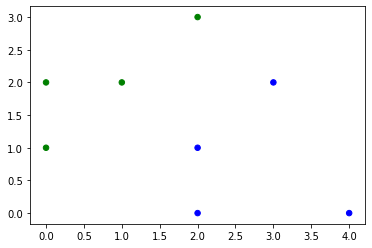

In [64]:
X = np.array([[0,1],[0,2],[1,2],[2,3],[4,0],[2,0],[2,1],[3,2]])
y = np.array([[1],[1],[1],[1],[-1],[-1],[-1],[-1]])

ax = plt.gca()
ax.scatter(X[:,0], X[:, 1], c = set_color(y.ravel()) ,s=30, linewidth=1)

# Formulation primale

In [65]:
Q = [0.] + [1.]*2
Q = np.diag(Q)
n_X = np.shape(X)[0]

A = np.concatenate((np.ones((n_X,1)),X),axis=1)
k,l = np.shape(A)

for i in range(k):
    A[i,:]=A[i,:]*y[i][0]


c = np.ones((n_X,1))

p = np.zeros((3,1))

Q = cvxopt.matrix(Q)
p = cvxopt.matrix(p)
A = cvxopt.matrix(-A)
c = cvxopt.matrix(-c)

In [66]:
sol = solvers.qp(Q,p,A,c)

b_opt = sol['x'][0]
w_opt = np.array([[sol['x'][1]],[sol['x'][2]]])

print('b optimal : ',b_opt)
print('w optimal : ')
print(w_opt)

     pcost       dcost       gap    pres   dres
 0:  1.8489e-01  5.8201e+00  2e+01  2e+00  1e+01
 1:  1.7181e+00 -2.8528e+00  7e+00  5e-01  4e+00
 2:  1.5965e+00  7.0382e-01  9e-01  2e-16  1e-15
 3:  1.0088e+00  9.7750e-01  3e-02  7e-16  2e-15
 4:  1.0001e+00  9.9978e-01  3e-04  2e-16  2e-15
 5:  1.0000e+00  1.0000e+00  3e-06  4e-16  8e-15
 6:  1.0000e+00  1.0000e+00  3e-08  4e-16  1e-15
Optimal solution found.
b optimal :  9.214830823715944e-09
w optimal : 
[[-1.00000001]
 [ 1.        ]]


Question 1

In [7]:
xx = np.arange(0,4,0.5)
coef_d = -w_opt[0][0]/w_opt[1][0]

yy_opt = [coef_d*e - b_opt/w_opt[1][0] for e in xx]

norme_w_opt = np.linalg.norm(w_opt)
dist = 1/norme_w_opt

yy_plus = [e + dist/np.cos(np.arctan(coef_d)) for e in yy_opt]
yy_moins = [e - dist/np.cos(np.arctan(coef_d)) for e in yy_opt]

Question 2

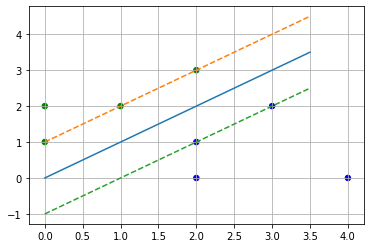

In [18]:
ax = plt.gca()
ax.scatter(X[:,0], X[:, 1], c = set_color(y.ravel()) ,s=30, linewidth=1)
plt.plot(xx,yy_opt)
plt.plot(xx,yy_plus, '--')
plt.plot(xx,yy_moins, '--')
plt.grid(True)
plt.show()

# Formulation duale

In [67]:
N = np.shape(X)[0]
Q = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Q[i,j] = y[i]*y[j]*np.dot(np.transpose(X[i]),X[j])

A = np.concatenate((np.transpose(y),-np.transpose(y)),axis=0)
A = np.concatenate((A,np.identity(N)),axis=0)

c = np.zeros((N+2,1))

p = -np.ones((N,1))

Q = cvxopt.matrix(Q)
p = cvxopt.matrix(p)
A = cvxopt.matrix(-A)
c = cvxopt.matrix(-c)

sol = solvers.qp(Q,p,A,c)

alpha_opt = sol['x']
w_opt = 0
for i in range(N):
    w_opt += y[i]*alpha_opt[i]*X[i]
    
b = []
for i in range(N):
    b.append(1/y[i]-np.dot(np.transpose(w_opt),X[i]))

b = []
for i in range(N):
    b.append(1/y[i]-np.dot(np.transpose(w_opt),X[i]))

marge = []
for i in range(N):
    marge.append(marge_fonctionnelle(X,y,w_opt,b[i]))

b_opt = b[marge.index(1)][0]

xx = np.arange(0,4,0.5)
coef_d = -w_opt[0]/w_opt[1]

yy_opt = [coef_d*e - b_opt/w_opt[1] for e in xx]

norme_w_opt = np.linalg.norm(w_opt)
dist = 1/norme_w_opt

yy_plus = [e + dist/np.cos(np.arctan(coef_d)) for e in yy_opt]
yy_moins = [e - dist/np.cos(np.arctan(coef_d)) for e in yy_opt]

     pcost       dcost       gap    pres   dres
 0: -2.1646e+00 -4.2295e+00  3e+01  5e+00  2e+00
 1: -9.7232e-01 -2.9244e+00  8e+00  1e+00  4e-01
 2: -7.2626e-01 -1.5993e+00  1e+00  4e-02  1e-02
 3: -9.6943e-01 -1.0277e+00  6e-02  1e-03  3e-04
 4: -9.9965e-01 -1.0003e+00  7e-04  1e-05  4e-06
 5: -1.0000e+00 -1.0000e+00  7e-06  1e-07  4e-08
 6: -1.0000e+00 -1.0000e+00  7e-08  1e-09  4e-10
Optimal solution found.


In [68]:
print('b optimal : ',b_opt)
print('Alphas optimaux : ')
print(alpha_opt)
print('w optimal : ')
print(w_opt)

b optimal :  8.134731999120959e-09
Alphas optimaux : 
[ 1.90e-01]
[ 1.05e-08]
[ 3.01e-01]
[ 5.08e-01]
[ 7.78e-09]
[ 9.38e-10]
[ 6.82e-01]
[ 3.18e-01]

w optimal : 
[-1.00000002  1.00000001]


In [58]:
def marge(x,y,w,b):
    res = y[0]*(np.dot(np.transpose(w),x)+b)
    return res

In [60]:
for i in range(len(X)):
    mf = marge(X[i],y[i],w_opt,b_opt)
    print(mf)
    if round(mf) == 1:
        print('Vecteur support: ',X[i], 'Classe : ', y[i])
        print('Marge fonctionelle : ', mf)

1.0000000175348809
Vecteur support:  [0 1] Classe :  [1]
Marge fonctionelle :  1.0000000175348809
2.0000000269350298
1.0000000087674406
Vecteur support:  [1 2] Classe :  [1]
Marge fonctionelle :  1.0000000087674406
1.0
Vecteur support:  [2 3] Classe :  [1]
Marge fonctionelle :  1.0
4.000000064535625
2.0000000282004464
1.0000000188002975
Vecteur support:  [2 1] Classe :  [-1]
Marge fonctionelle :  1.0000000188002975
1.0000000275677379
Vecteur support:  [3 2] Classe :  [-1]
Marge fonctionelle :  1.0000000275677379


In [45]:
x=[0,3]
s_primale = np.dot(np.transpose(w_opt),x)+b_opt
print(s_duale)

3.0000000363351784


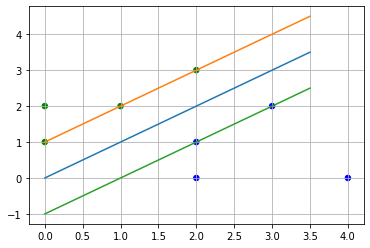

In [24]:
ax = plt.gca()
ax.scatter(X[:,0], X[:, 1], c = set_color(y.ravel()) ,s=30, linewidth=1)
plt.plot(xx,yy_opt)
plt.plot(xx,yy_plus)
plt.plot(xx,yy_moins)
plt.grid(True)
plt.show()

In [42]:
x=[0,3]
s_duale = np.dot(np.transpose(w_opt),x)+b_opt
print(s_duale)

3.0000000363351784
